Notice I am Doing That in Google Colab as My PC Does not have GPUs ??

In [1]:
!nvidia-smi

Mon Aug 11 15:19:08 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Step 1 : Install ultralytics Python Package

In [2]:
!pip install ultralytics

Step 2 : Import All Required Libraries

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.177 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 43.5/112.6 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import Image

Step 3 : Load Dataset From RoboFlow ?

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="OQloyBEkIa5d3pBnt68C")
project = rf.workspace("project-uyrxf").project("ppe_detection-v1x3l")
version = project.version(2)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [6]:
dataset.location

'/content/PPE_Detection-2'

Step 4 : Start Training Process of The Model ??

In [7]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=50 imgsz=640

Ultralytics 8.3.177 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/PPE_Detection-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pret

Step 6 : Examine Training Results ??

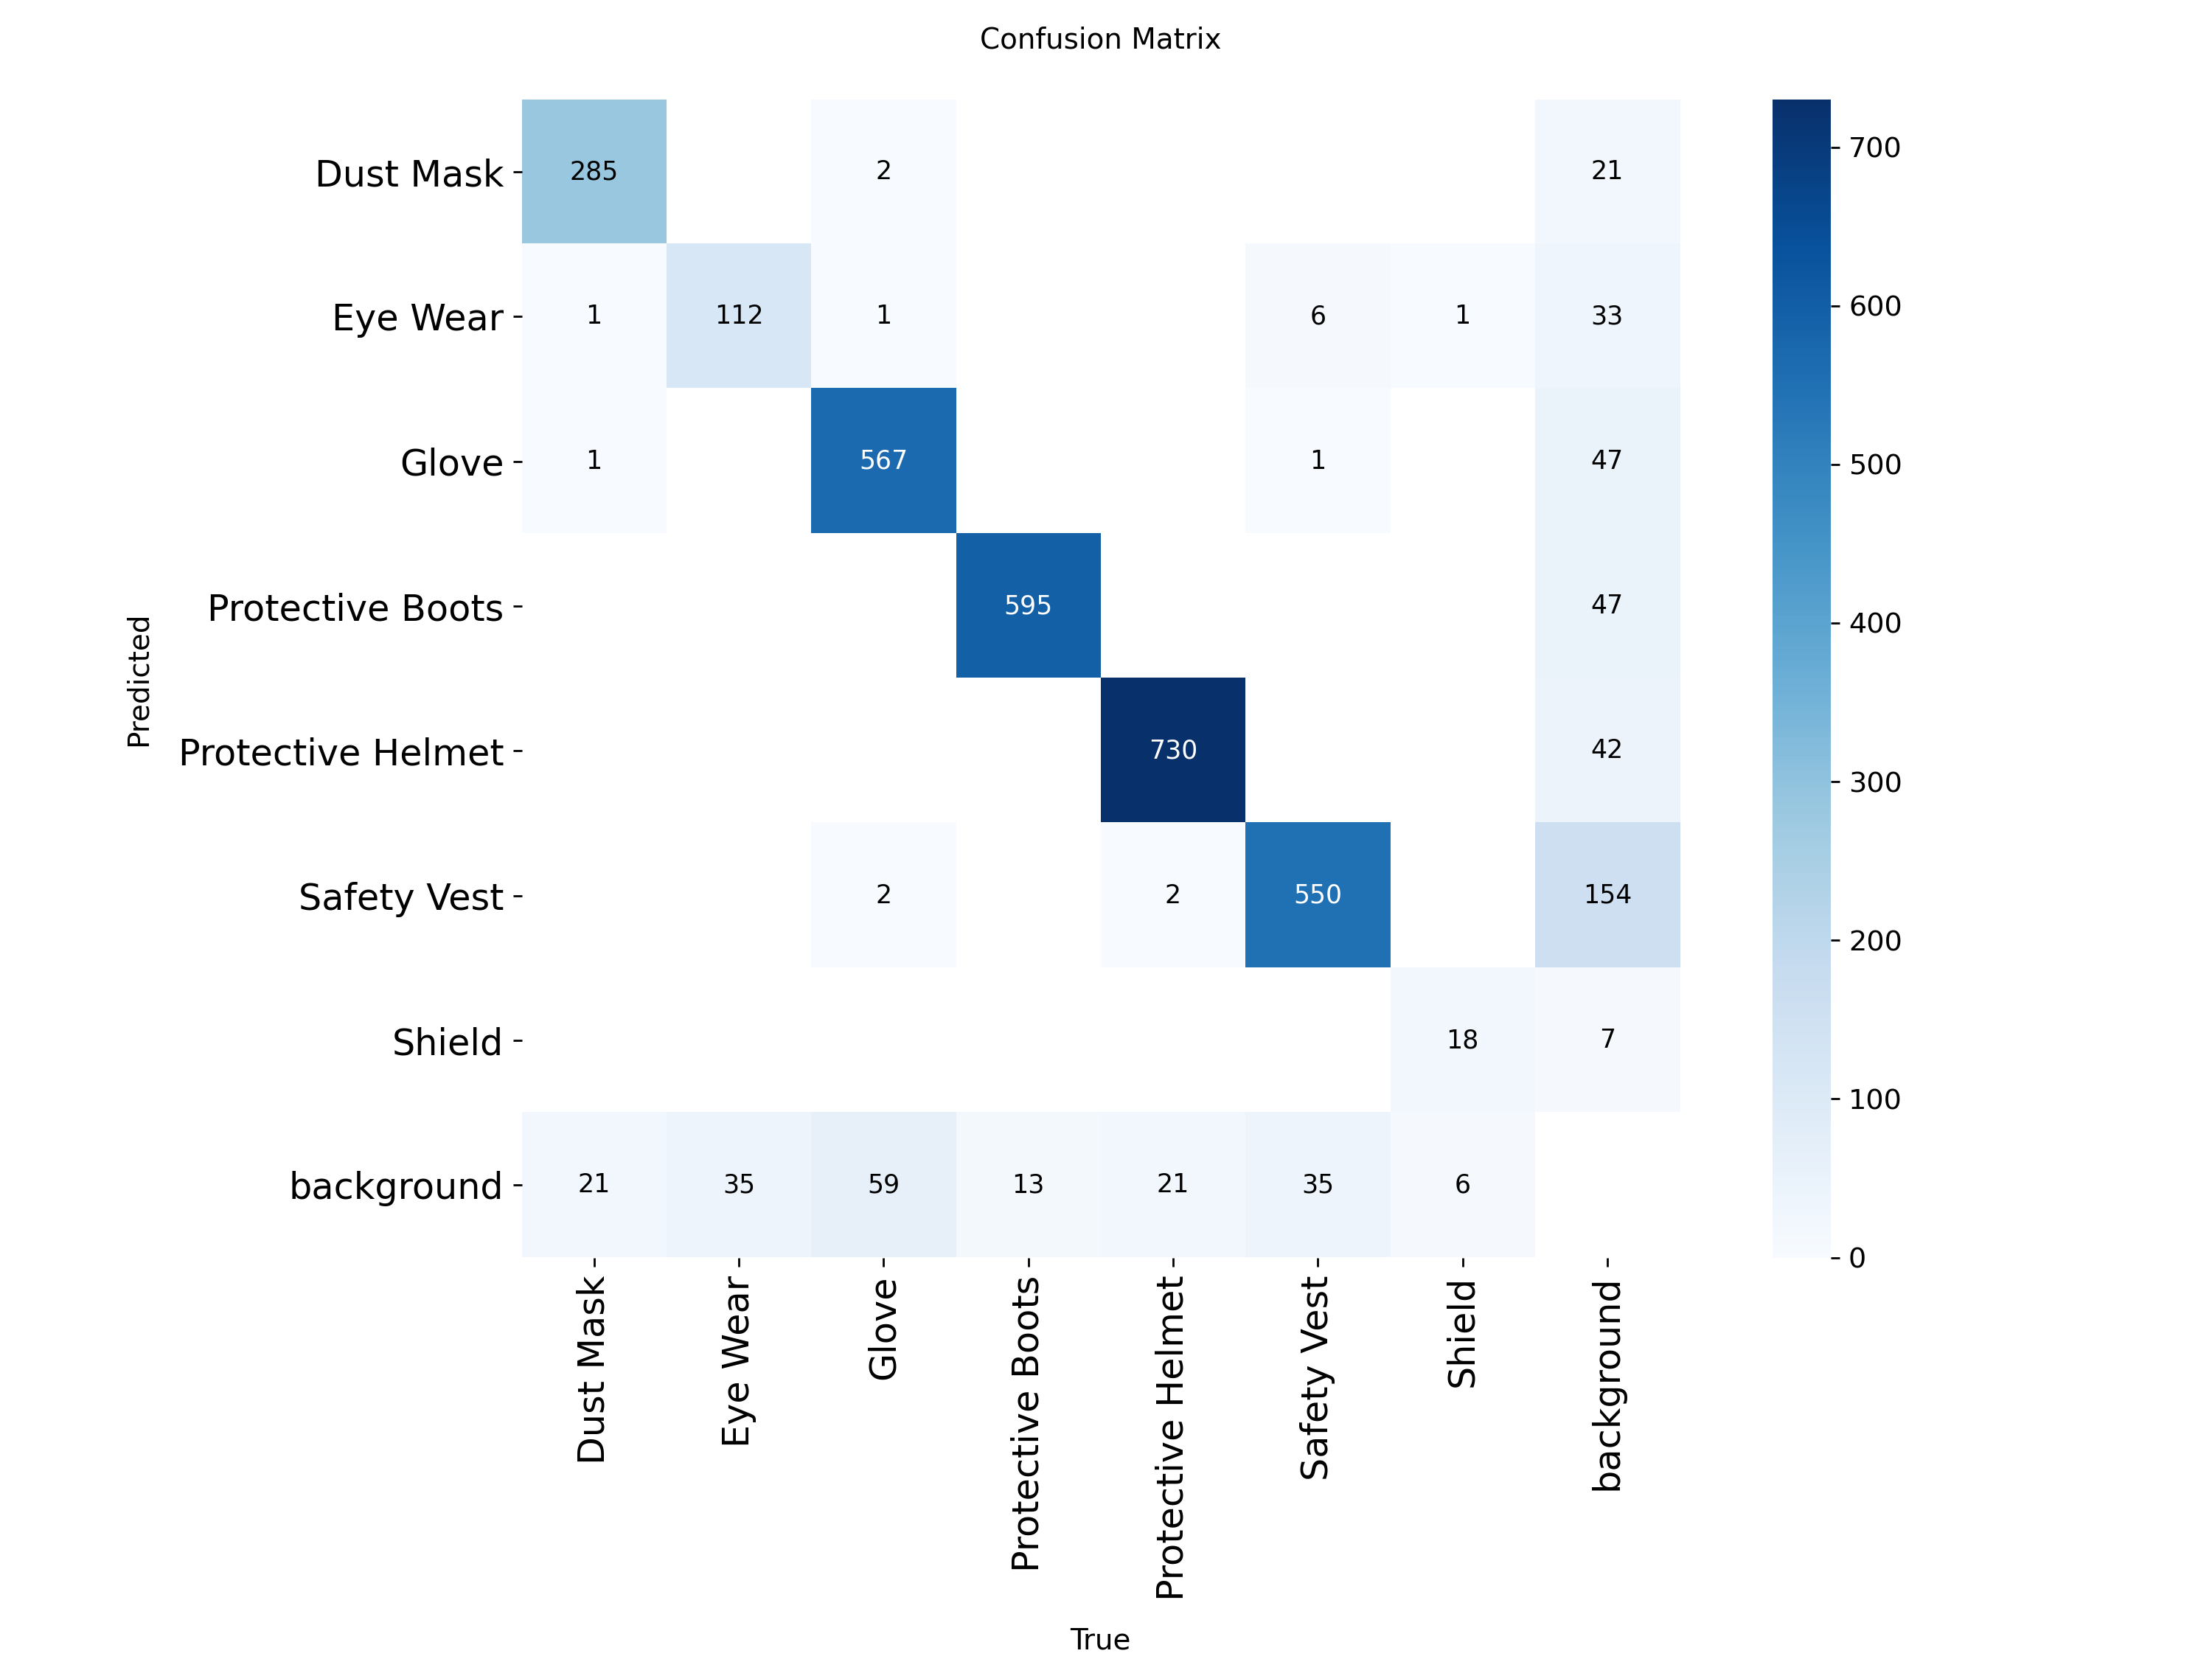

In [8]:
Image("/content/runs/detect/train/confusion_matrix.png", width=600)

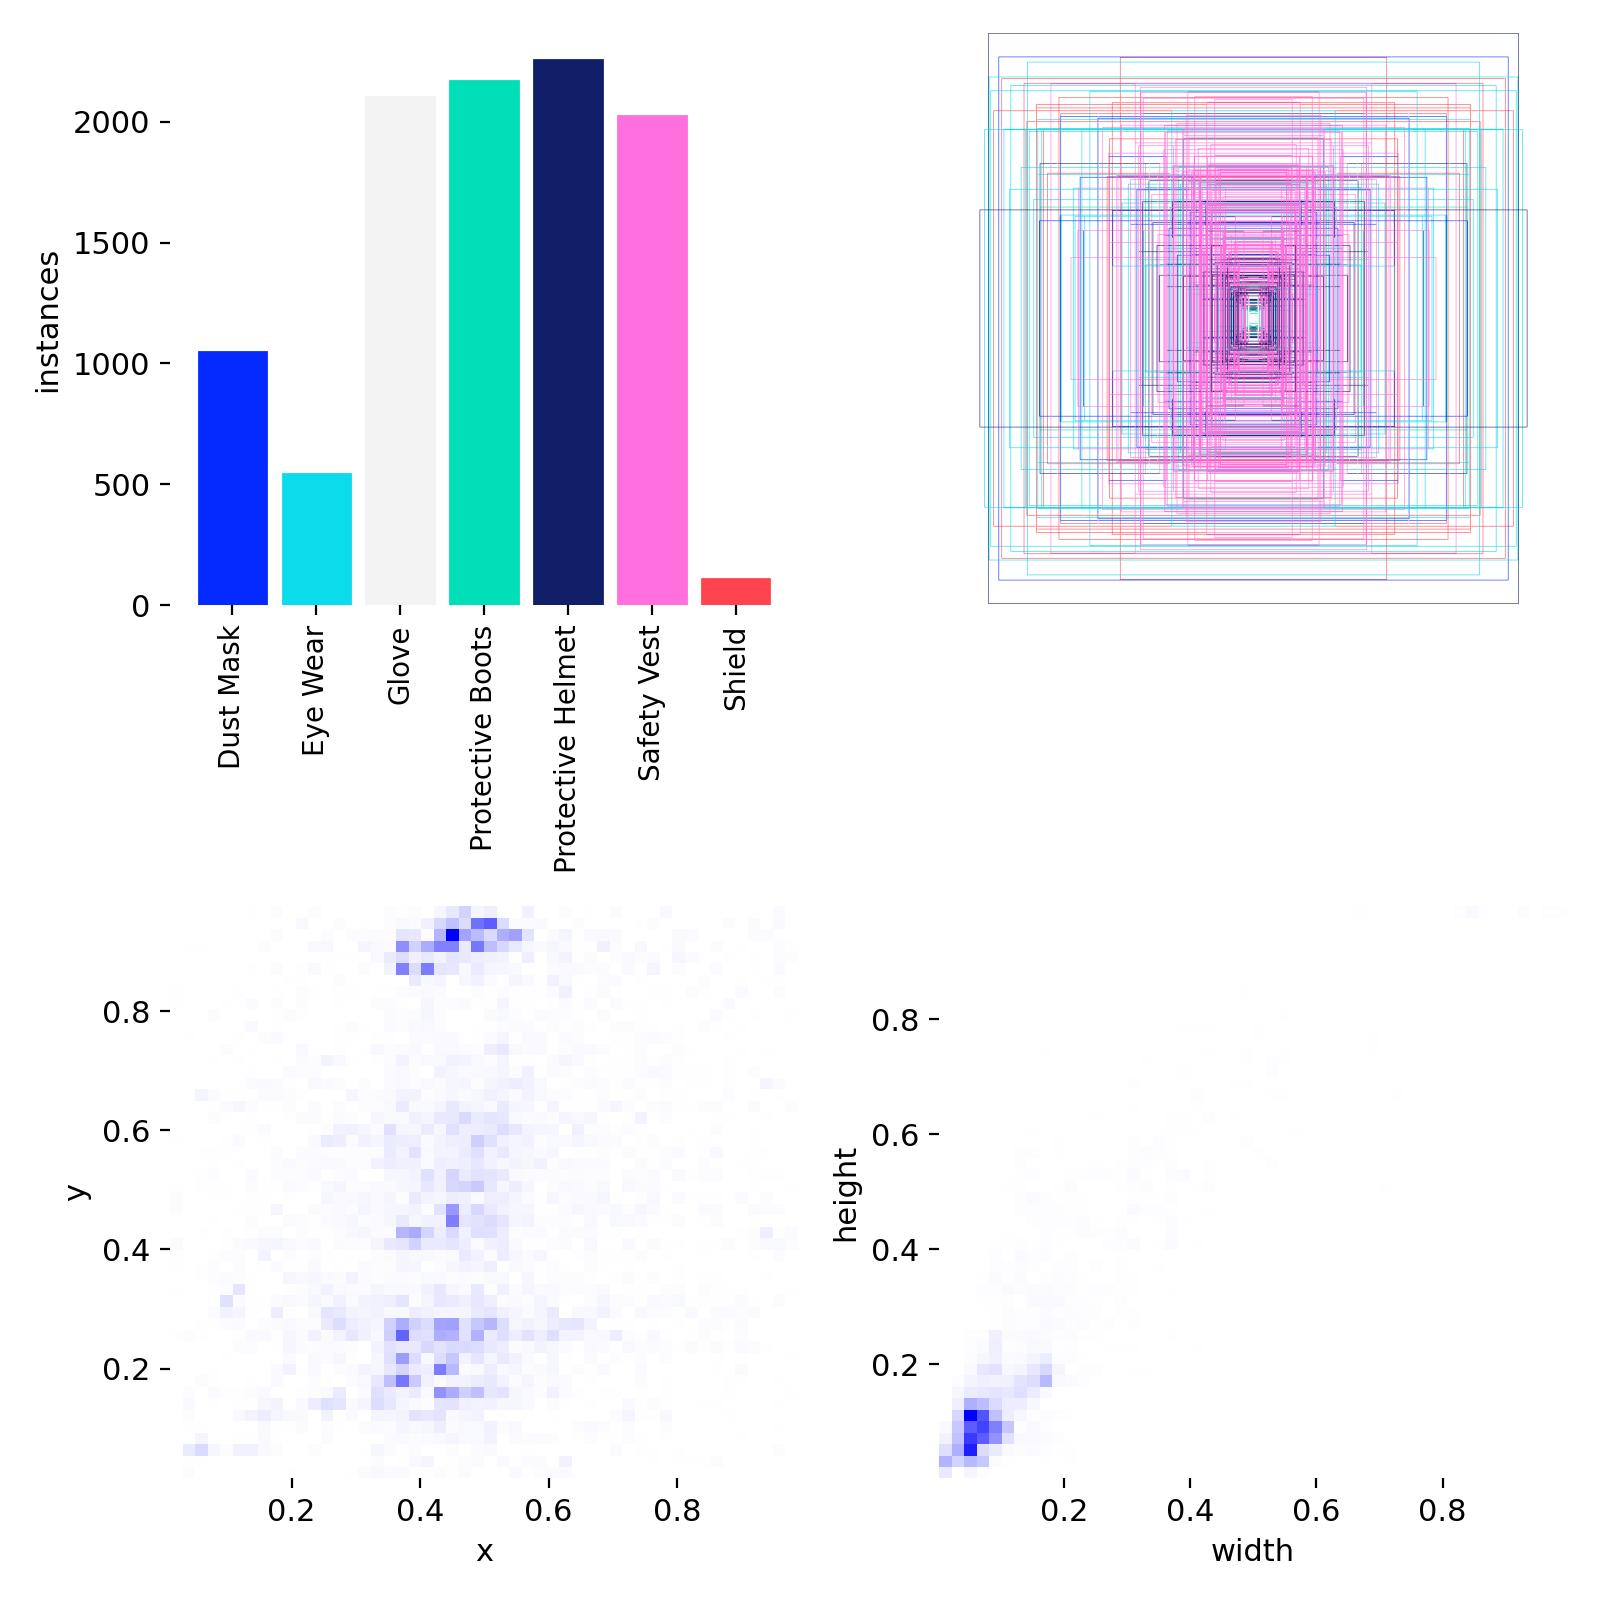

In [9]:
Image("/content/runs/detect/train/labels.jpg", width=600)

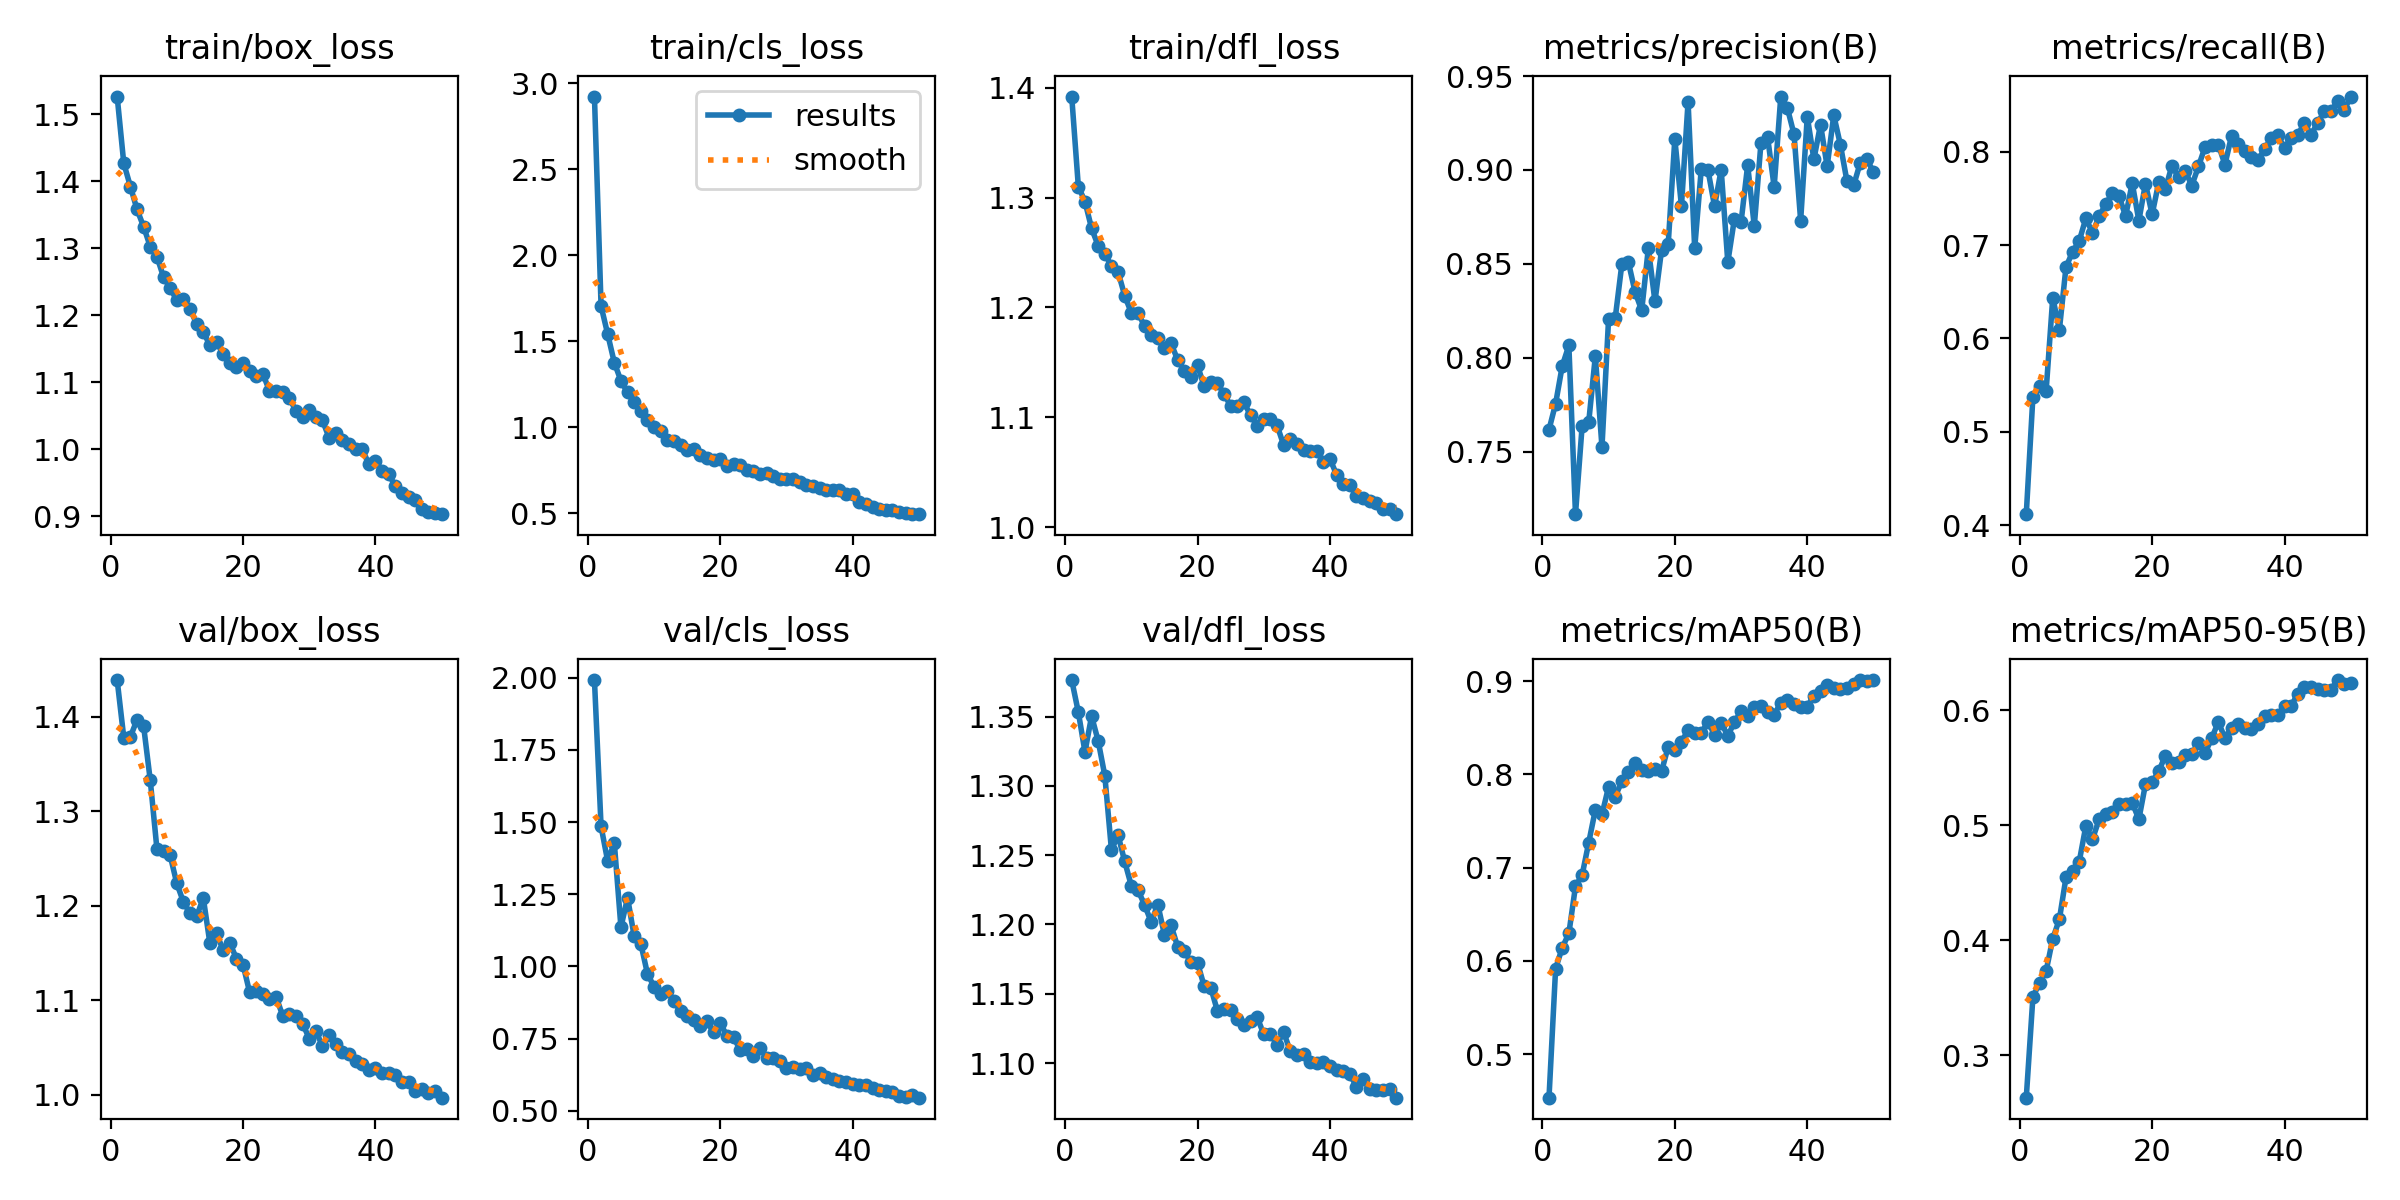

In [10]:
Image("/content/runs/detect/train/results.png", width=600)

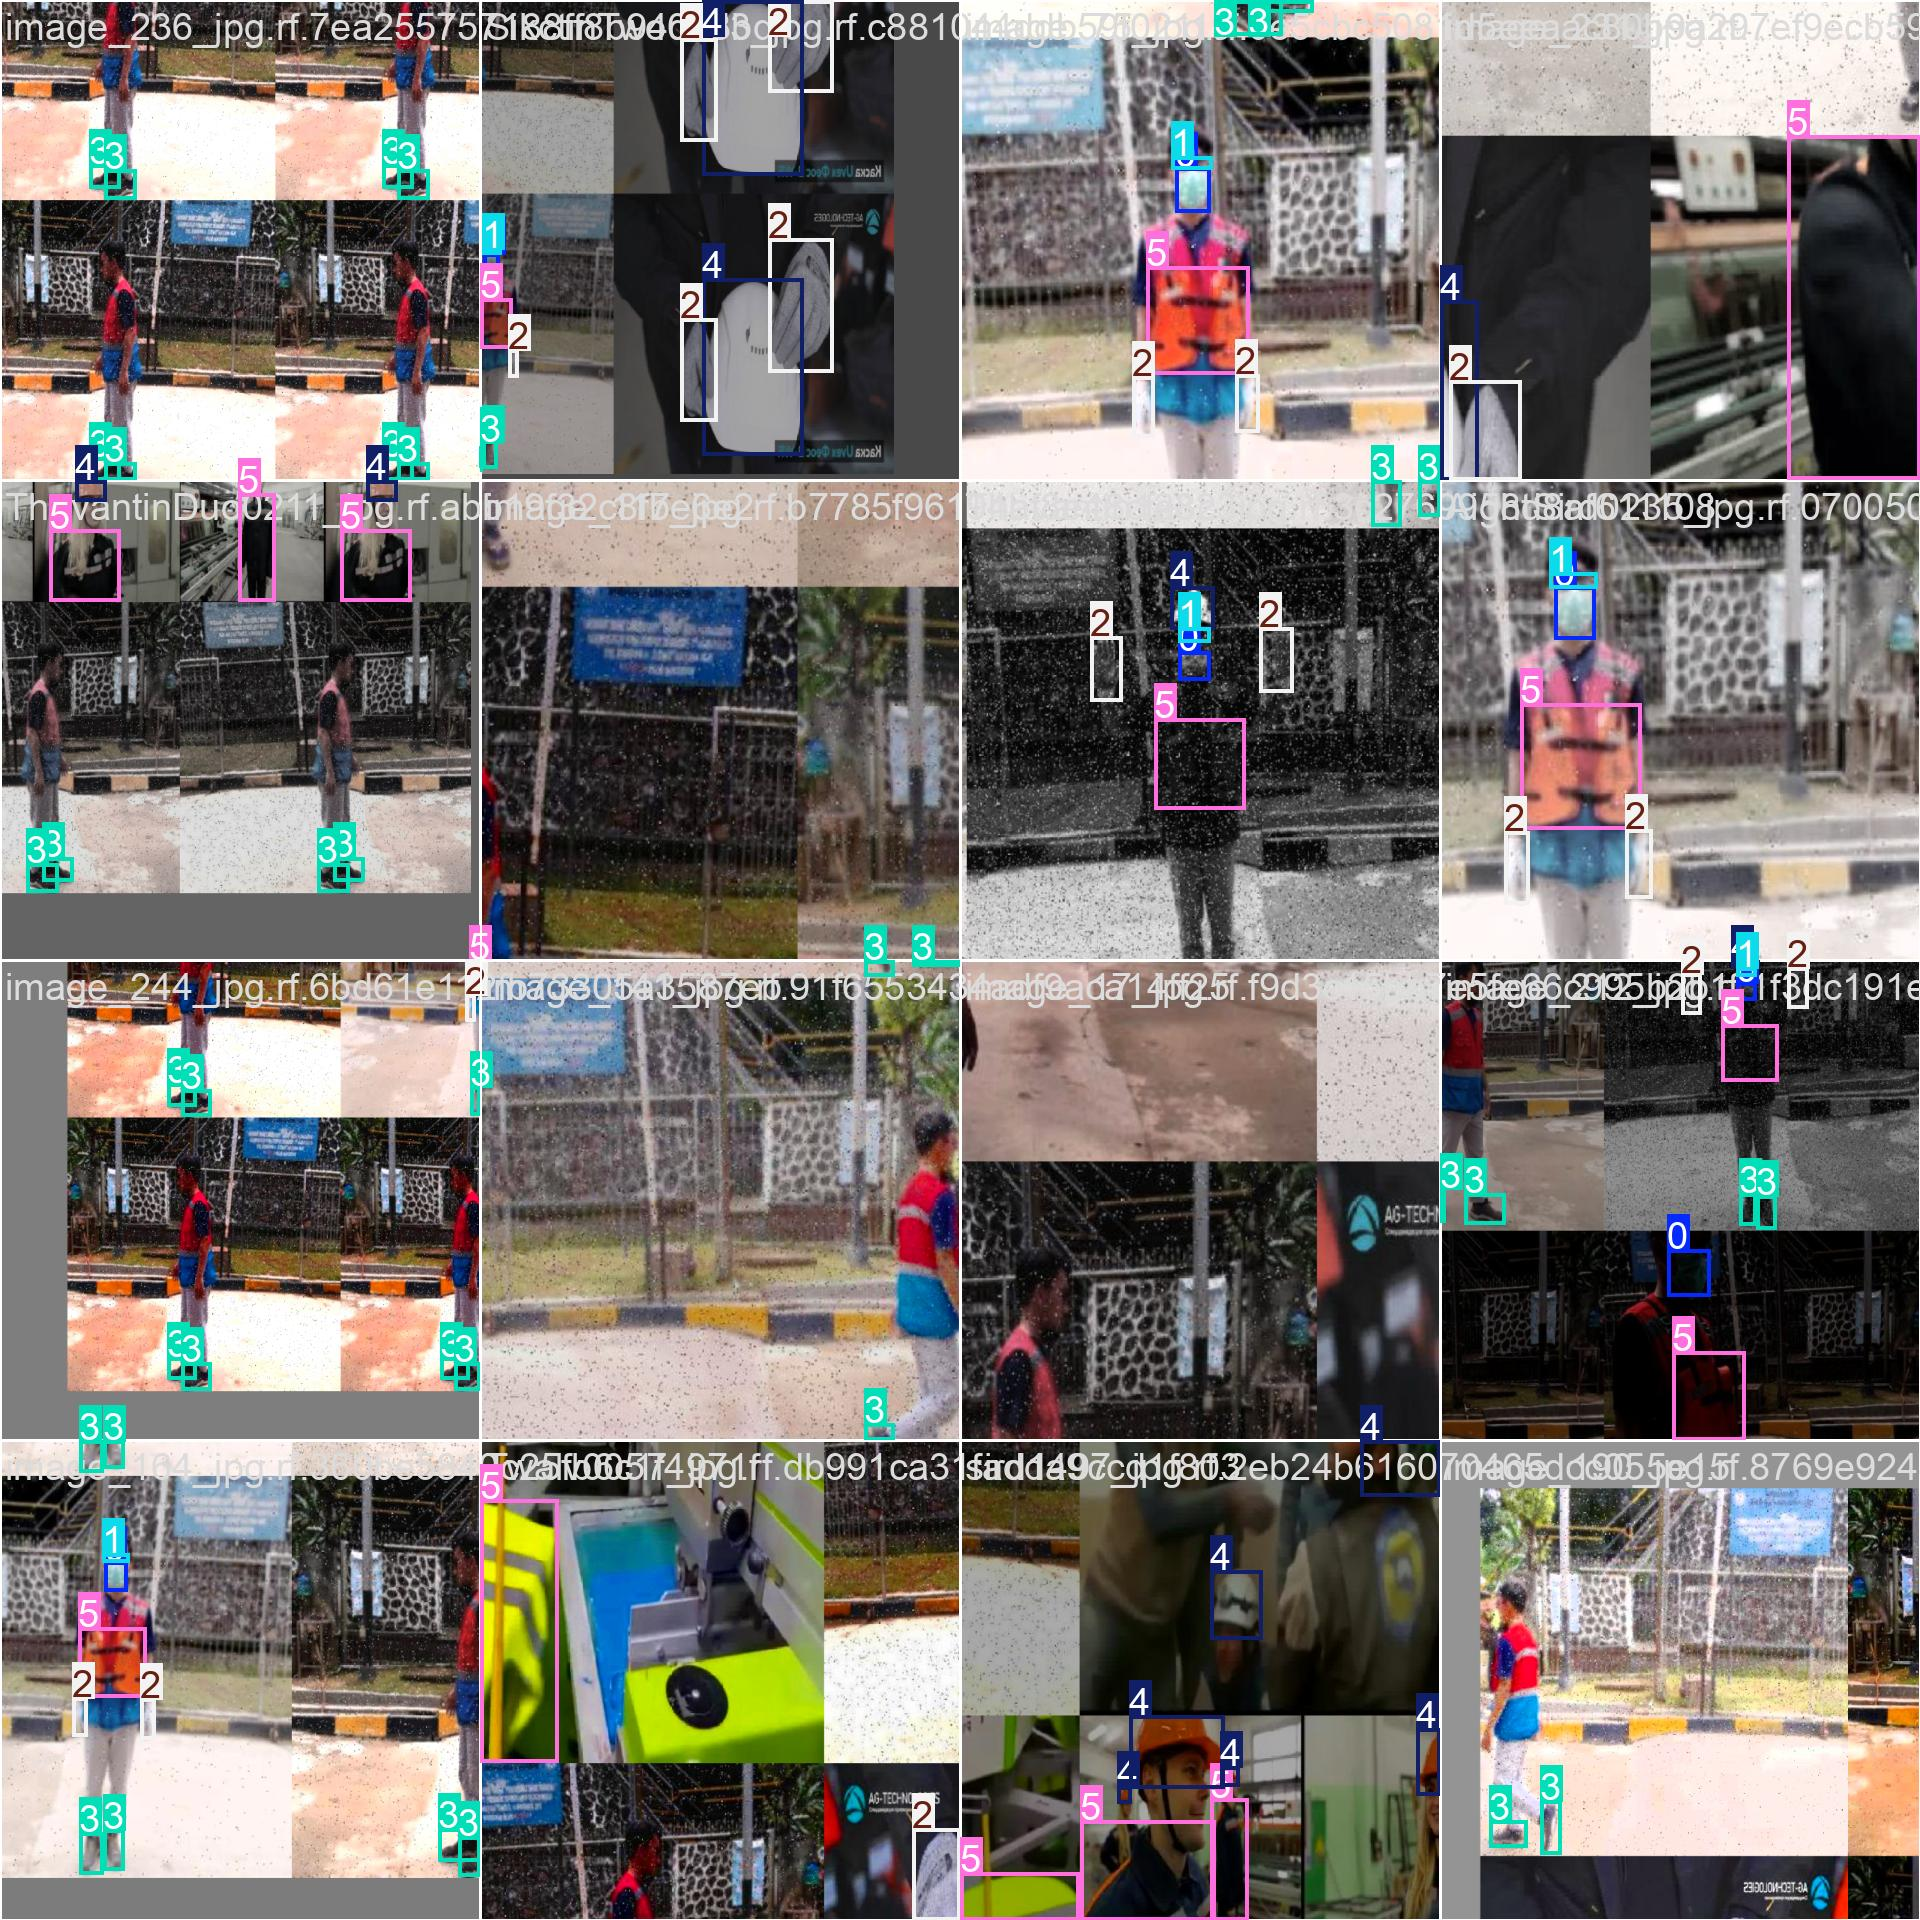

In [11]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

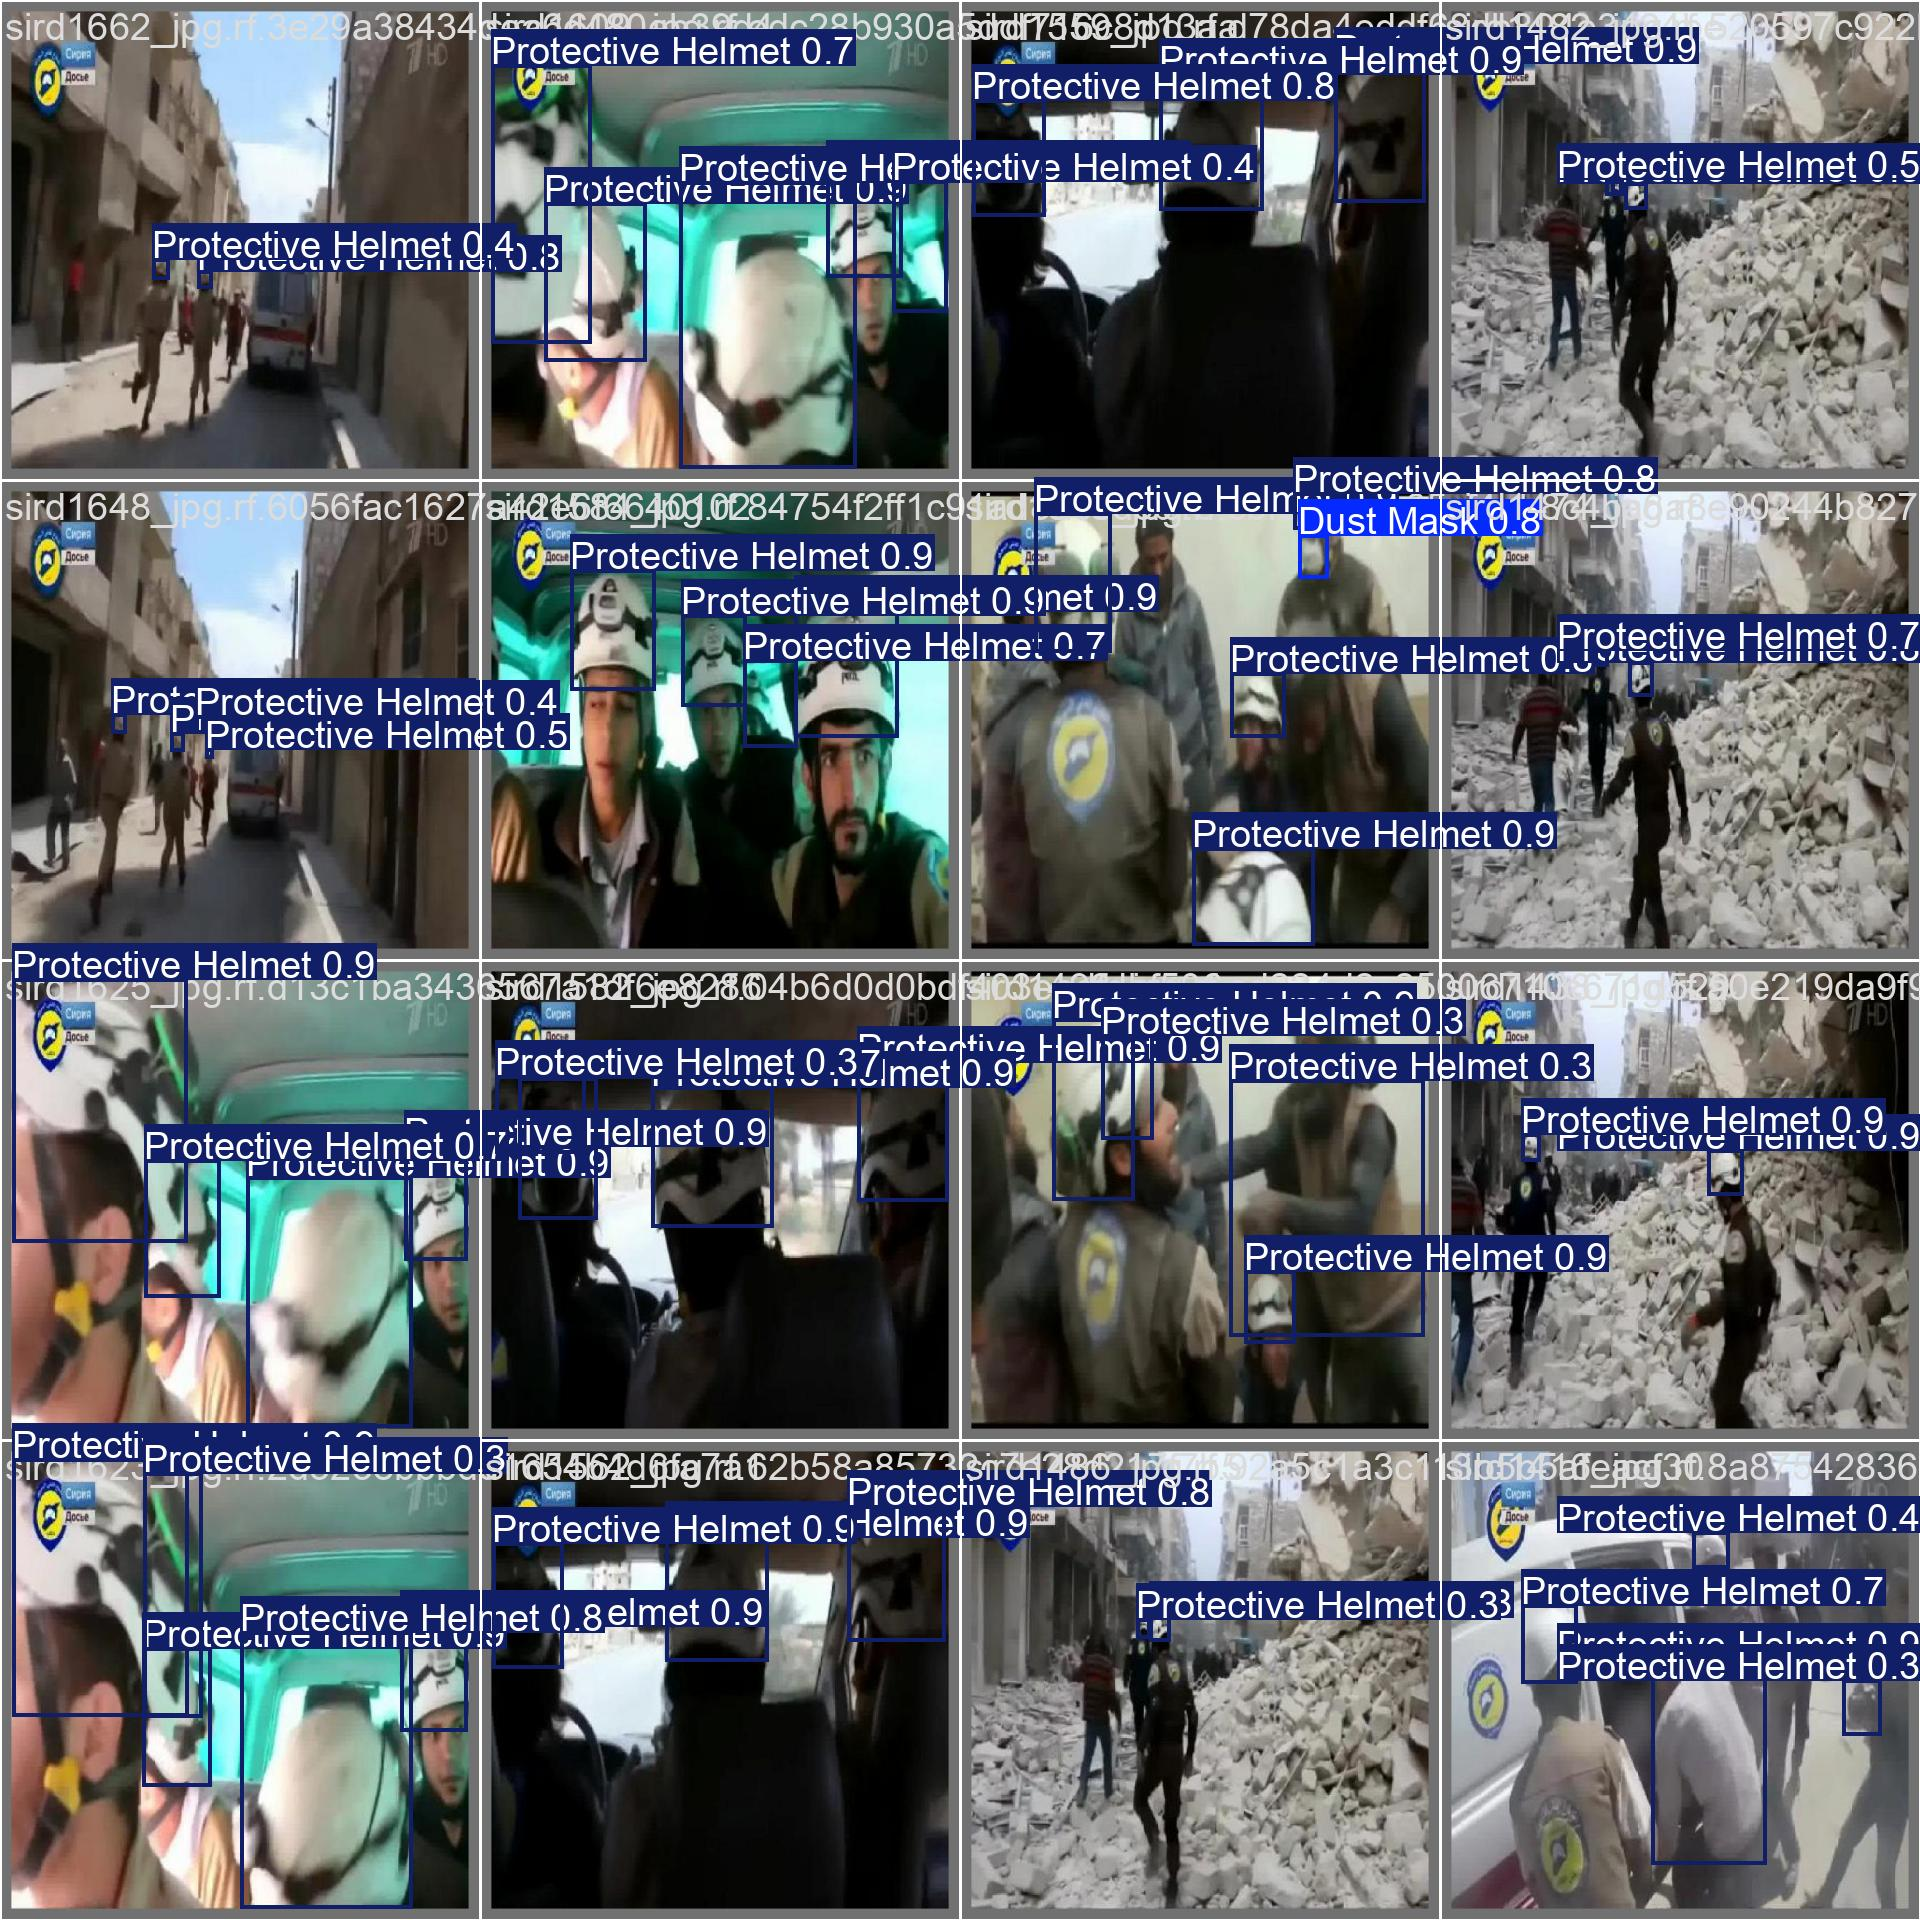

In [12]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

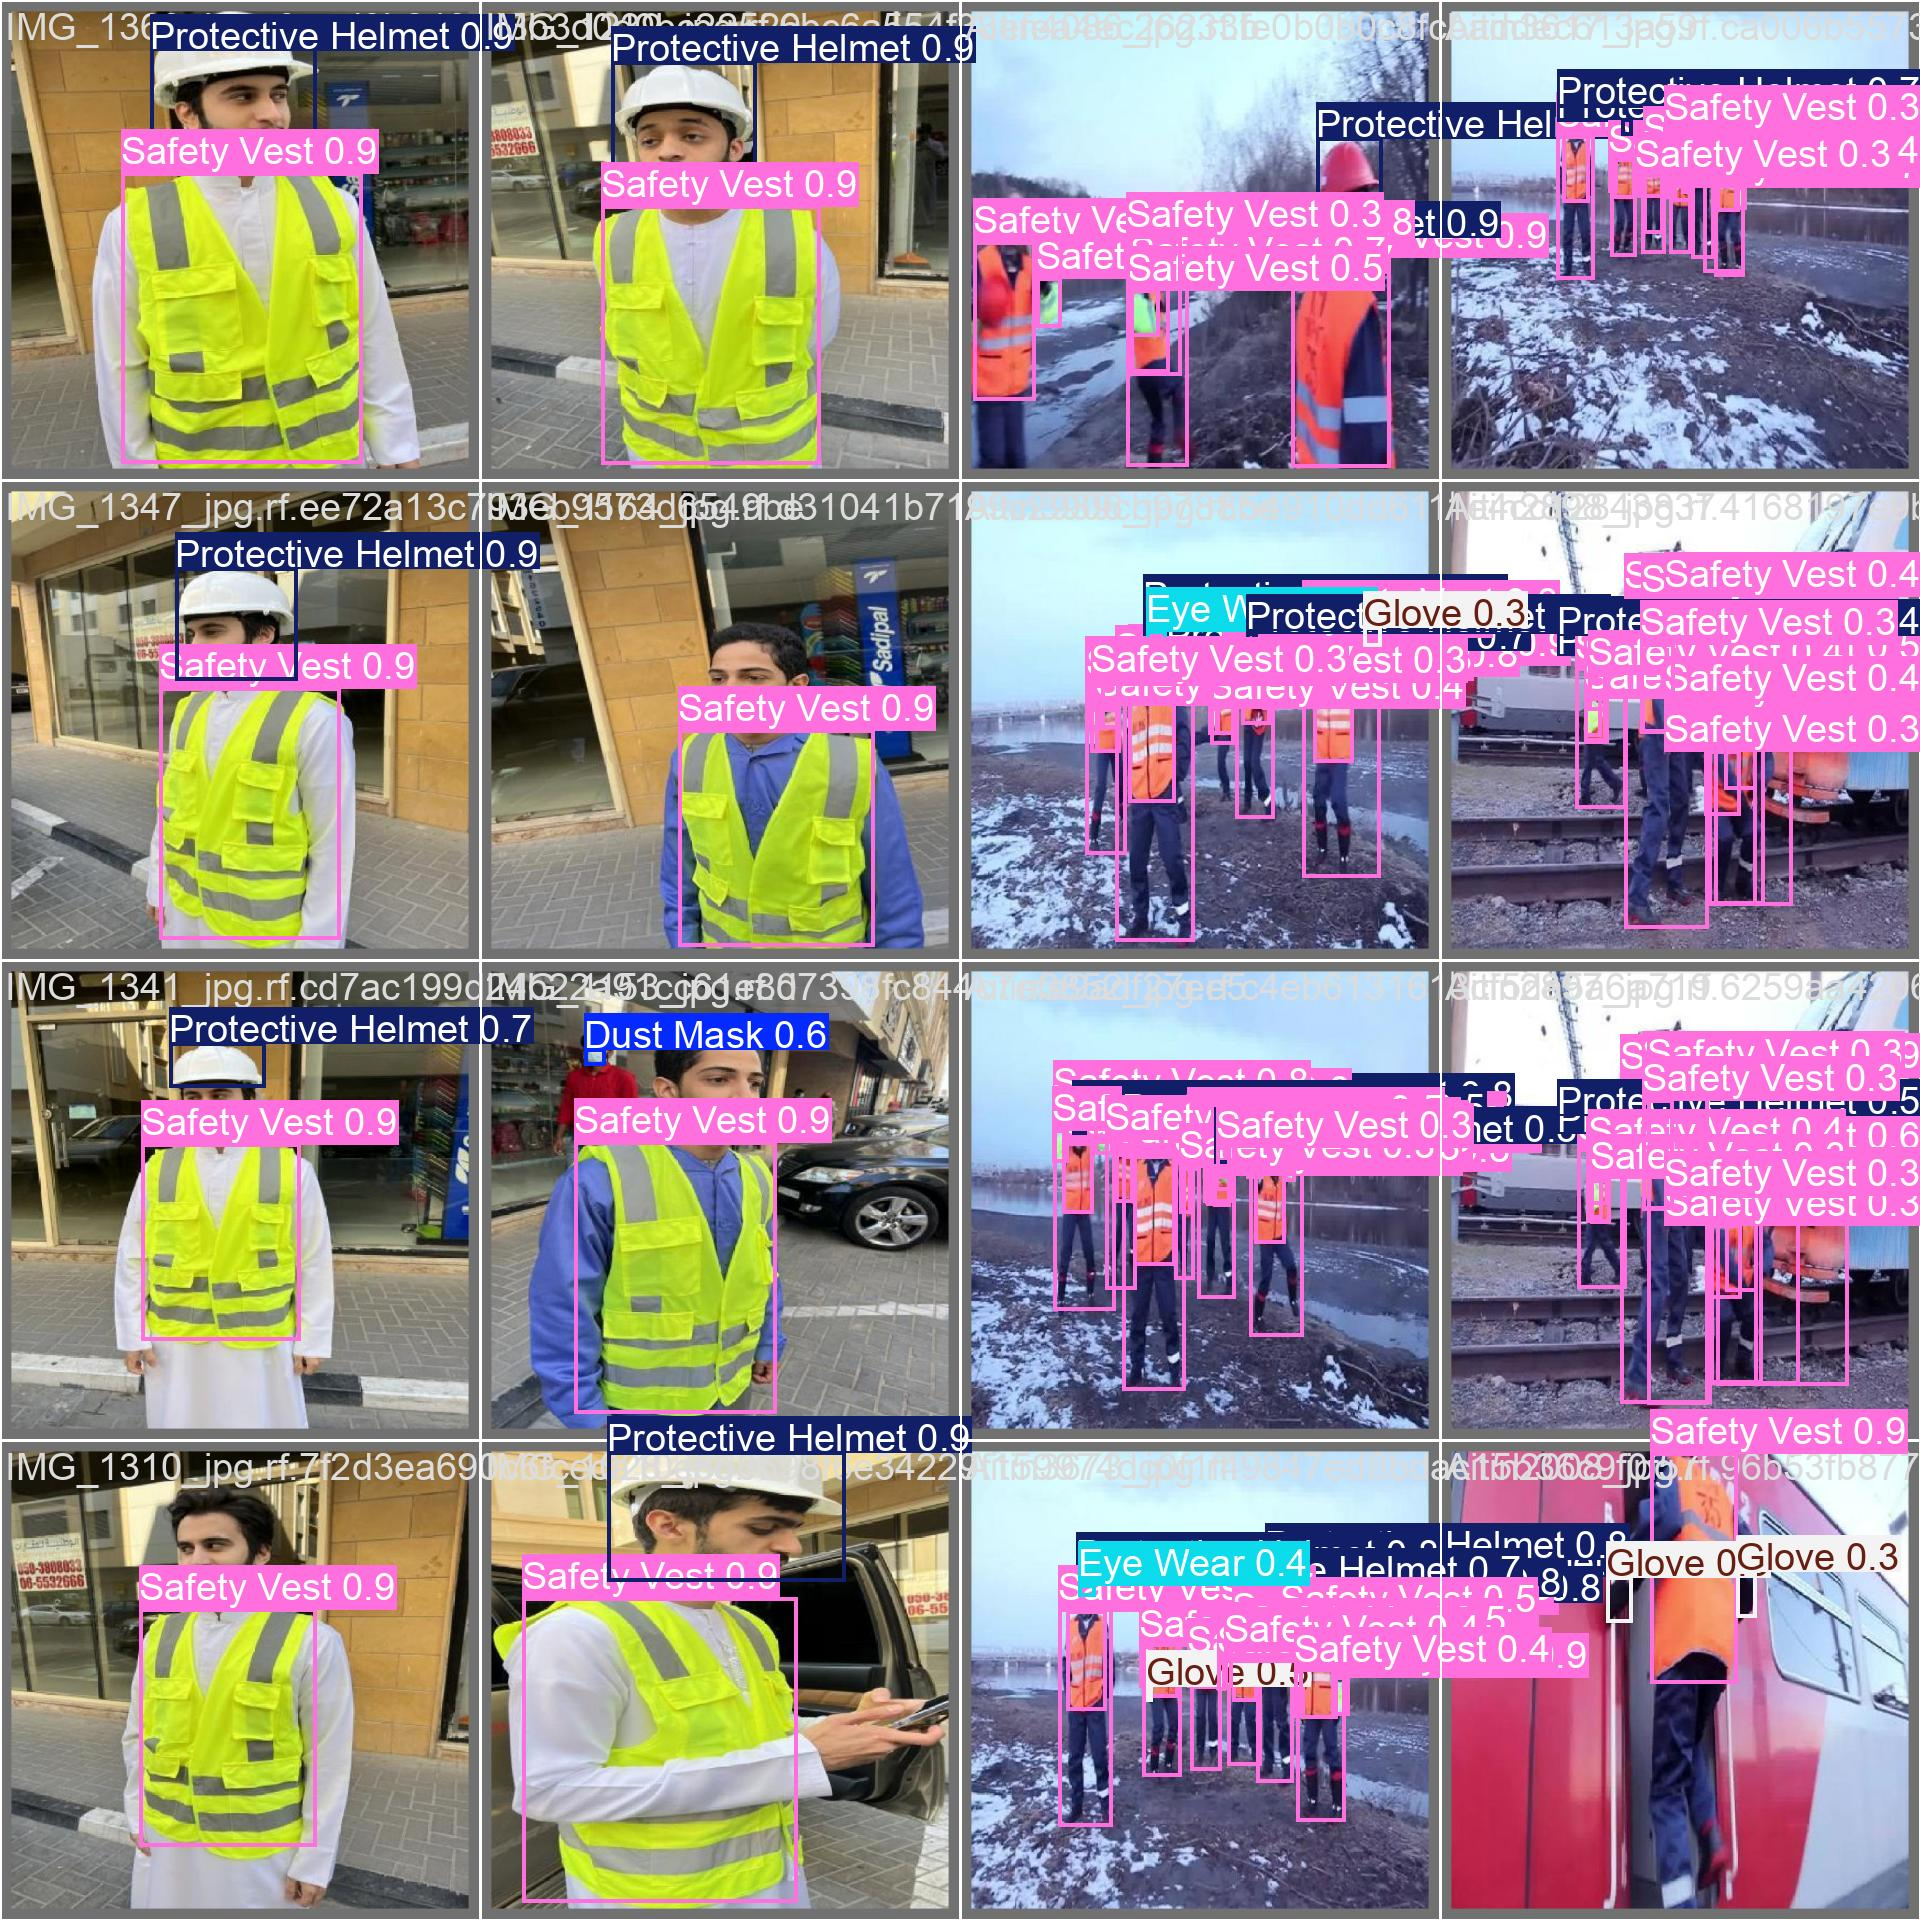

In [13]:
Image("/content/runs/detect/train/val_batch1_pred.jpg", width=600)

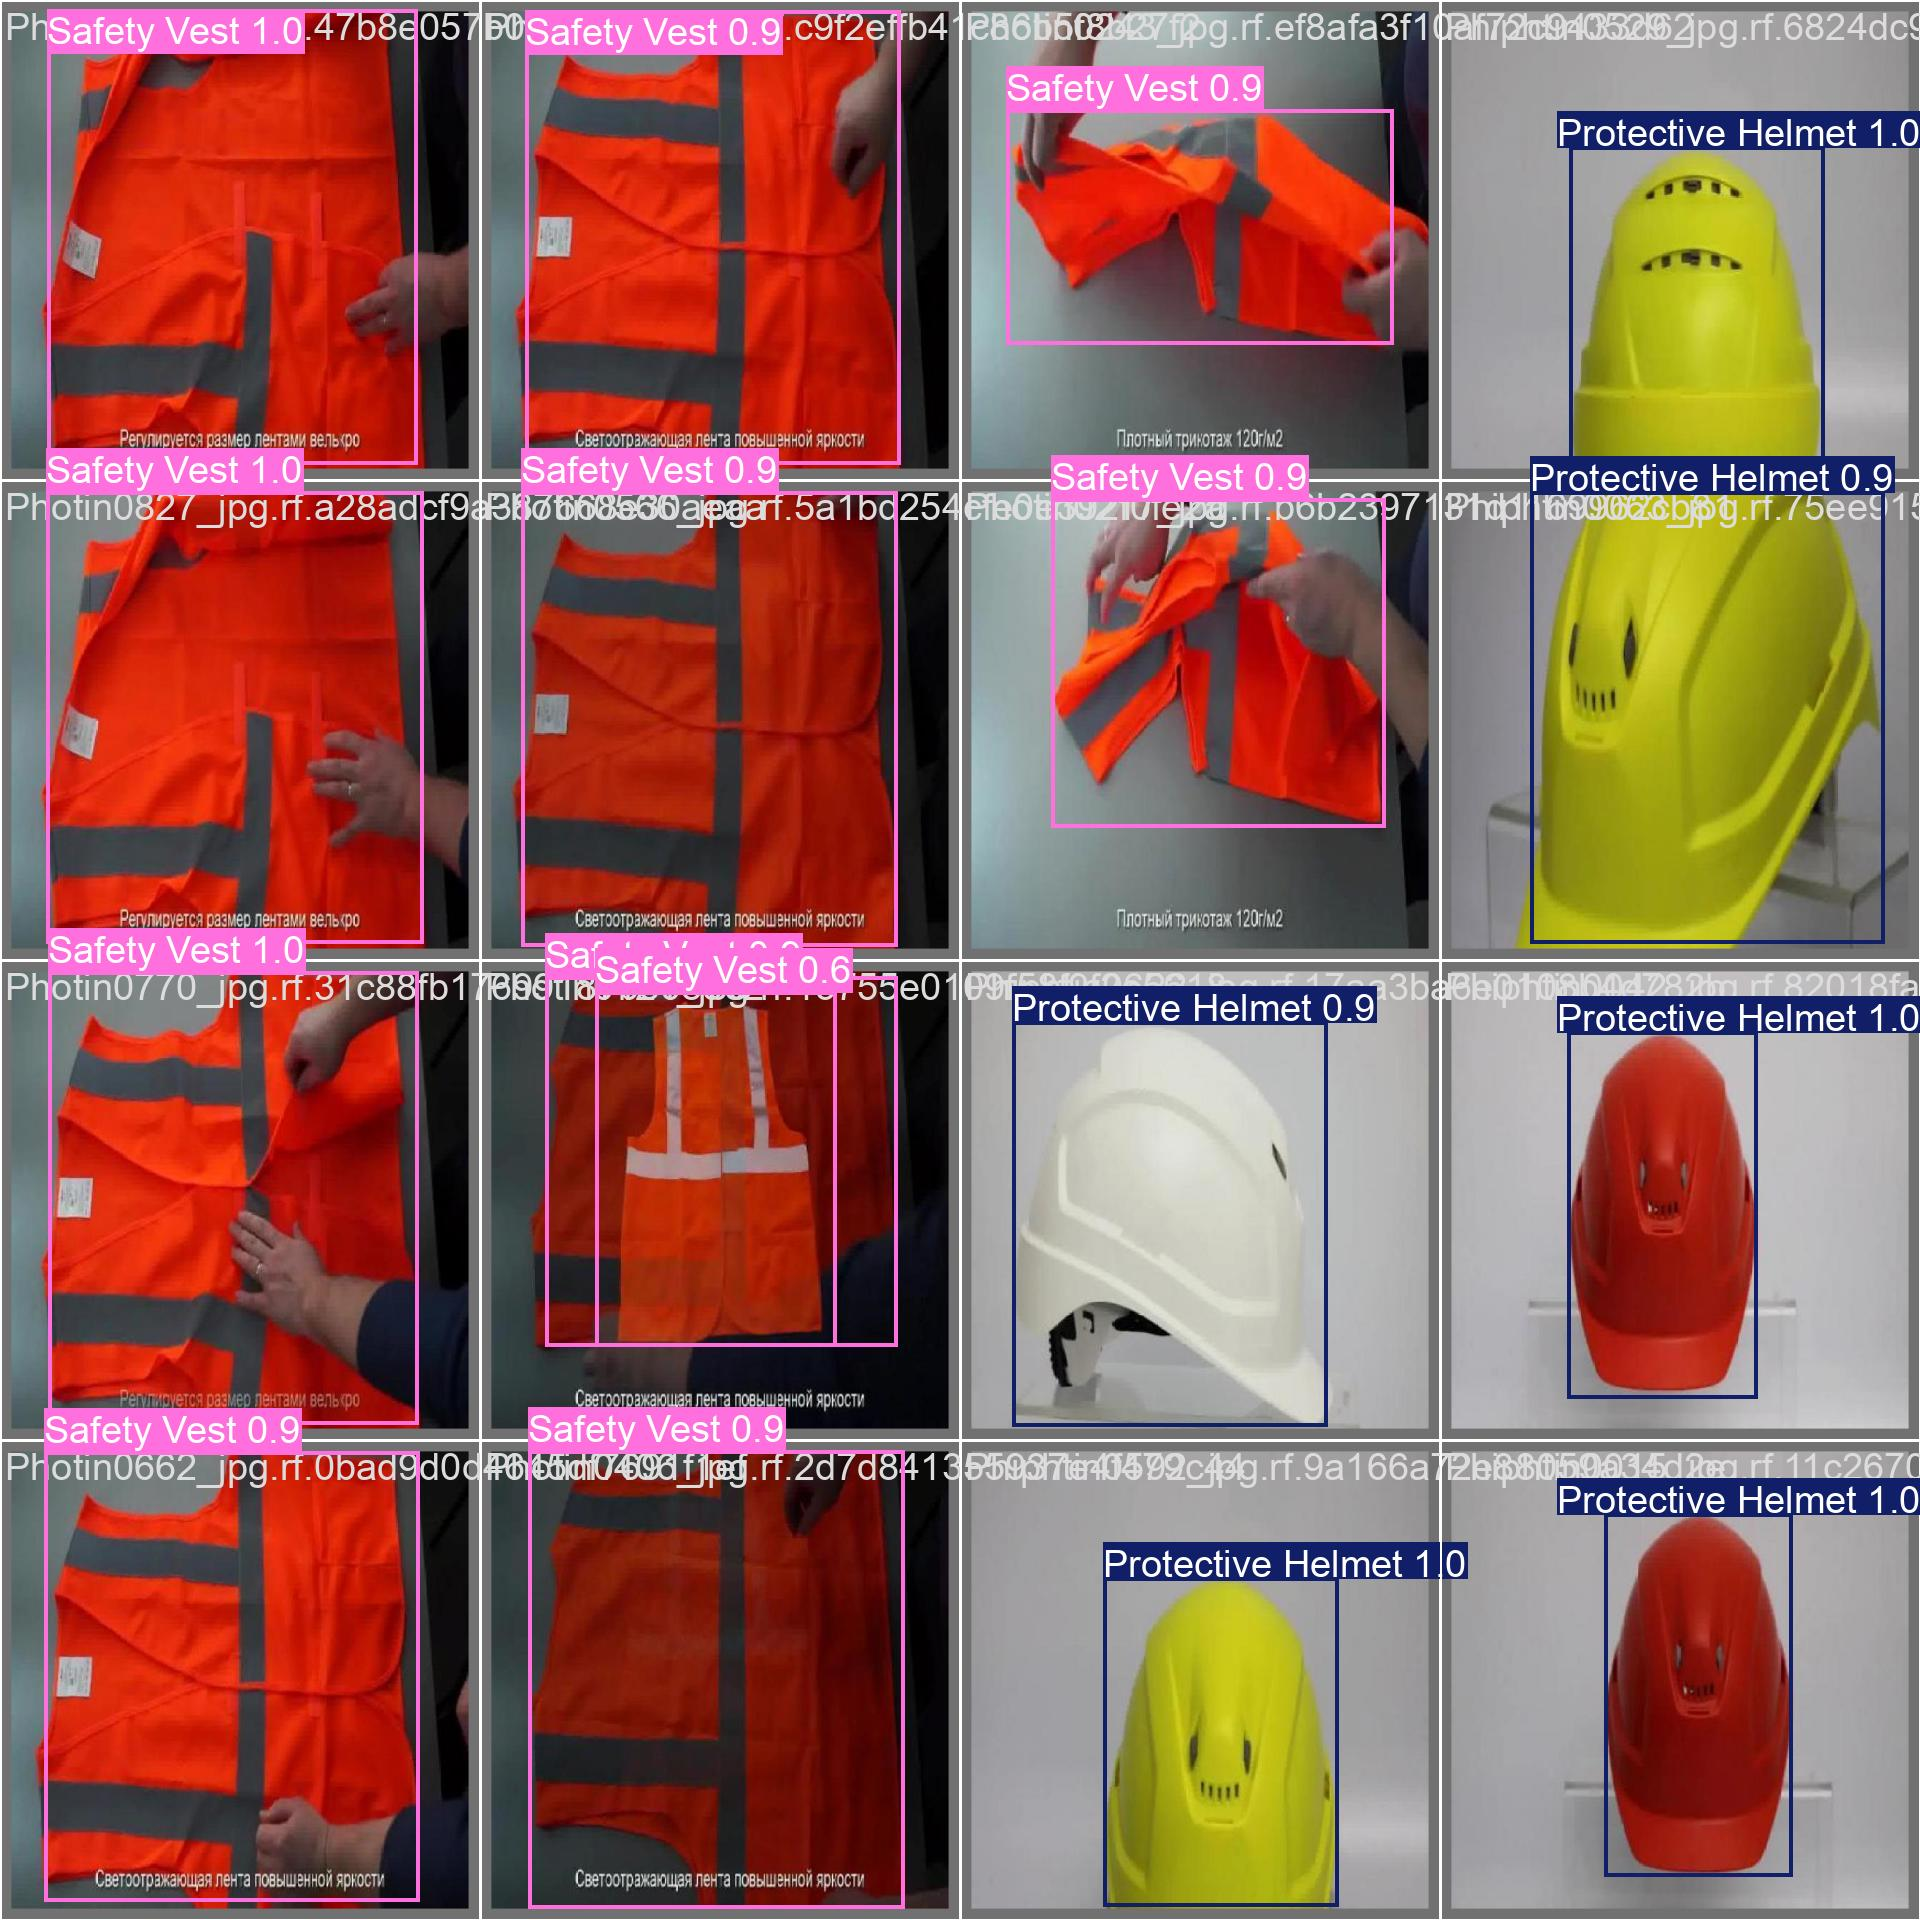

In [14]:
Image("/content/runs/detect/train/val_batch2_pred.jpg", width=600)

Step 7 : Validate Fine-Tuned Model ??

In [15]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.177 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1356.8±739.5 MB/s, size: 68.3 KB)
val: Scanning /content/PPE_Detection-2/valid/labels.cache... 637 images, 0 backgrounds, 0 corrupt: 100% 637/637 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 40/40 [00:08<00:00,  4.83it/s]
                   all        637       3064      0.905      0.855      0.902      0.627
             Dust Mask        299        308      0.966      0.923      0.959       0.67
              Eye Wear        146        147      0.841      0.728      0.803      0.468
                 Glove        346        631      0.959      0.886      0.943      0.674
      Protective Boots        298        608      0.956      0.964      0.983      0.696
     Protective Helmet        403        753      

Step 8 : Inference With Custom Model on Images ??

In [16]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25  source={dataset.location}/test/images save=True

Ultralytics 8.3.177 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

image 1/322 /content/PPE_Detection-2/test/images/000446_jpg.rf.63a960737ed4b762294eea1ad1a92791.jpg: 640x640 1 Protective Helmet, 11.5ms
image 2/322 /content/PPE_Detection-2/test/images/20220721_161946_jpg.rf.905c375aa964159f9edab2a55a6e7476.jpg: 640x640 (no detections), 10.7ms
image 3/322 /content/PPE_Detection-2/test/images/20220721_162015_jpg.rf.ccb5d8a5aed0bb50c04431fa0b0d5479.jpg: 640x640 1 Dust Mask, 1 Glove, 9.3ms
image 4/322 /content/PPE_Detection-2/test/images/20220721_162036_jpg.rf.2664c2f59604cd2380a51fd174055a7e.jpg: 640x640 1 Dust Mask, 10.9ms
image 5/322 /content/PPE_Detection-2/test/images/20220721_162308_jpg.rf.913971a6c64f38eabc6b69bab4409b46.jpg: 640x640 2 Eye Wears, 9.4ms
image 6/322 /content/PPE_Detection-2/test/images/20220721_162435_jpg.rf.d478427044384d4e32ba0c25b15b720d.jpg: 640x640 1 Eye Wear, 9.6

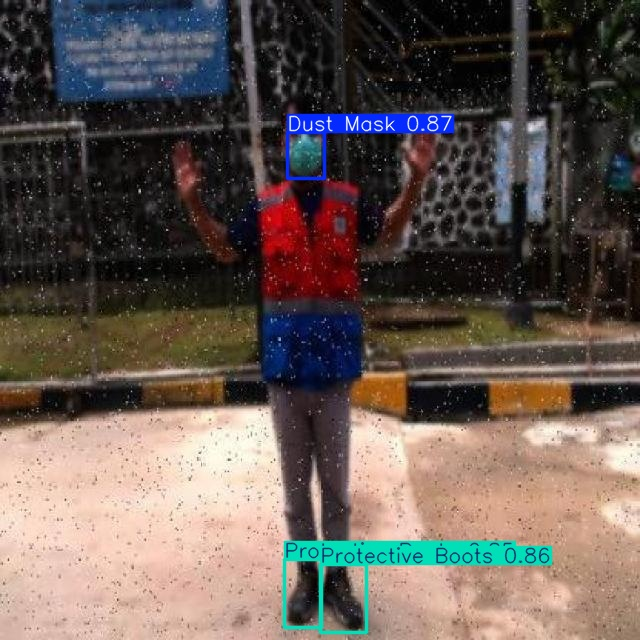

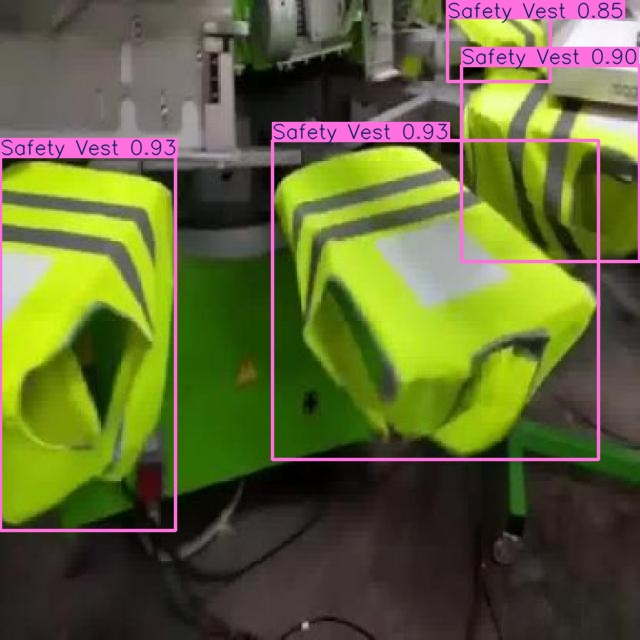

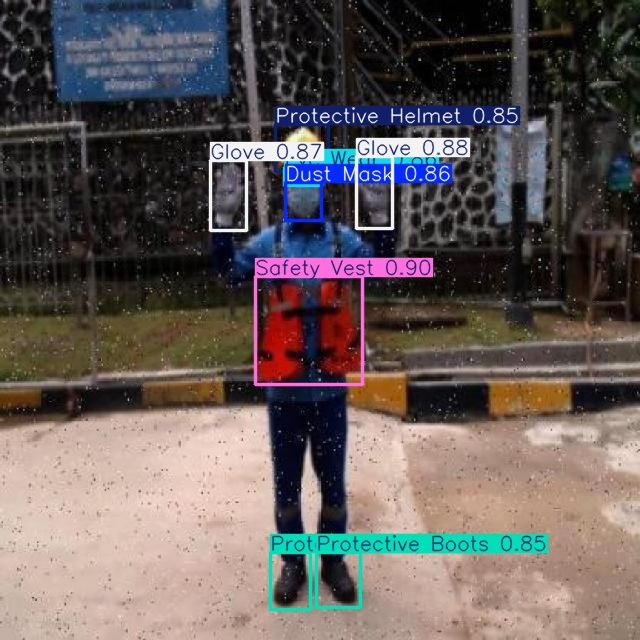

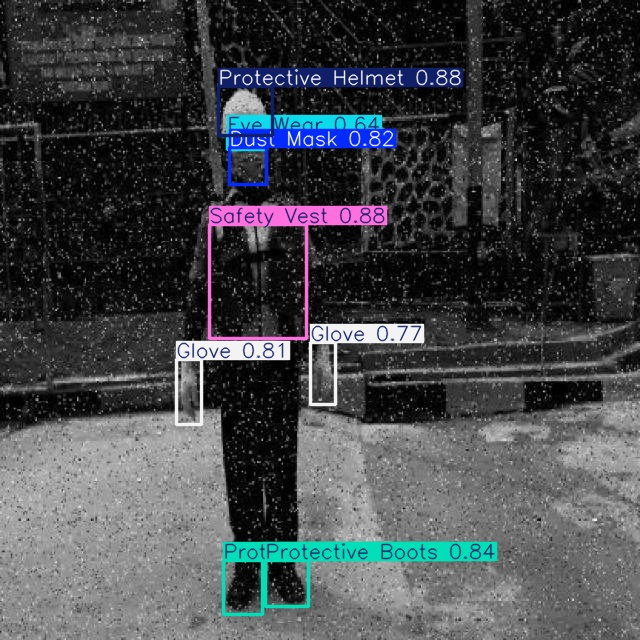

In [18]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob("/content/runs/detect/predict*/"), key=os.path.getmtime)

for img in glob.glob(f'{latest_folder}/*.jpg')[1:5]:
    display(IPyImage(filename=img, width=600))
    print("\n===========================================\n")

Step 9 : Test The Model On Custom Images ??

In [24]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25  source=factory.jpeg save=True

Ultralytics 8.3.177 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/factory.jpeg: 448x640 1 Glove, 2 Protective Helmets, 2 Safety Vests, 48.5ms
Speed: 4.2ms preprocess, 48.5ms inference, 168.2ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


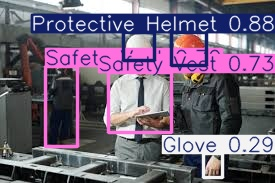

In [25]:
Image("/content/runs/detect/predict2/factory.jpg", width=600)